# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

In [2]:
df = pd.read_csv('../data/raw/shopping_trends.csv', sep=',')

df.columns = df.columns.str.strip()

df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
print(df.shape)

df.info()

(3900, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 1

Data terdiri dari **3900 baris dan 18 kolom**. Untuk tipe data sendiri sudah cukup baik dan memiliki tipe data yang sudah tepat.

In [4]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


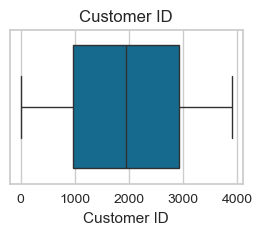

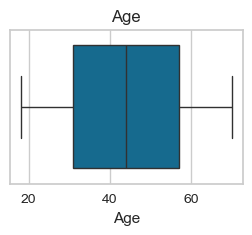

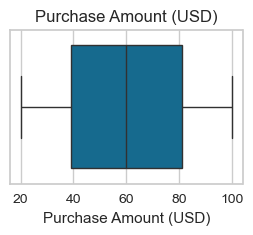

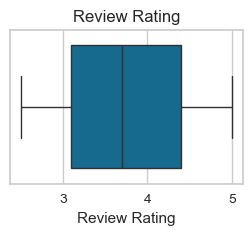

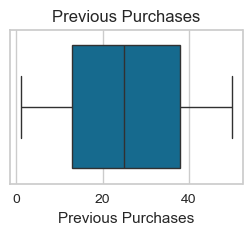

In [5]:
numerical = df.select_dtypes(include='number').columns
categorical = df.select_dtypes(include='object').columns

for col in numerical:
    plt.figure(figsize=(3, 2))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

Pada grafik di atas, ditunjukkan bahwa persebaran data sudah cukup baik dan tidak terlihat adanya outliers

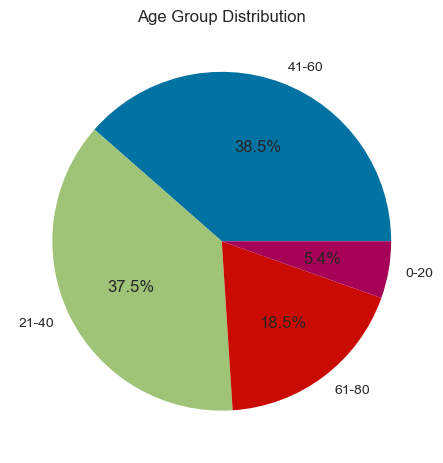

In [6]:
bins = [0, 20, 40, 60, 80]

# Fix the column name to match the actual column in the dataframe
age_group = pd.cut(df['Age'], bins=bins, labels=['0-20', '21-40', '41-60', '61-80'])

plt.pie(age_group.value_counts(), labels=age_group.value_counts().index, autopct='%1.1f%%')
plt.title('Age Group Distribution')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [7]:
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

Pertama, dilakukan pengahapusan data kosong dan setelah diamati tidak ada lagi data yang kosong.

In [8]:
df.duplicated().sum()

0

Karena tidak ada data duplikat, tahap penghapusan data duplikat dapat dilewati dan dilanjutkan dengan penanganan outliers. Saat ini nilai dataset tidak memiliki outliers sehingga dapat dilanjutkan ke tahap selanjutnya

In [9]:
label_encoder = LabelEncoder()

df_encoded = df.copy()

for col in categorical:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


Pada tahap ini, saya menggunakan `LabelEncoder` untuk melakukan encoding data kategorikal menjadi data numerik sehingga dihashilkan data seperti di atas.

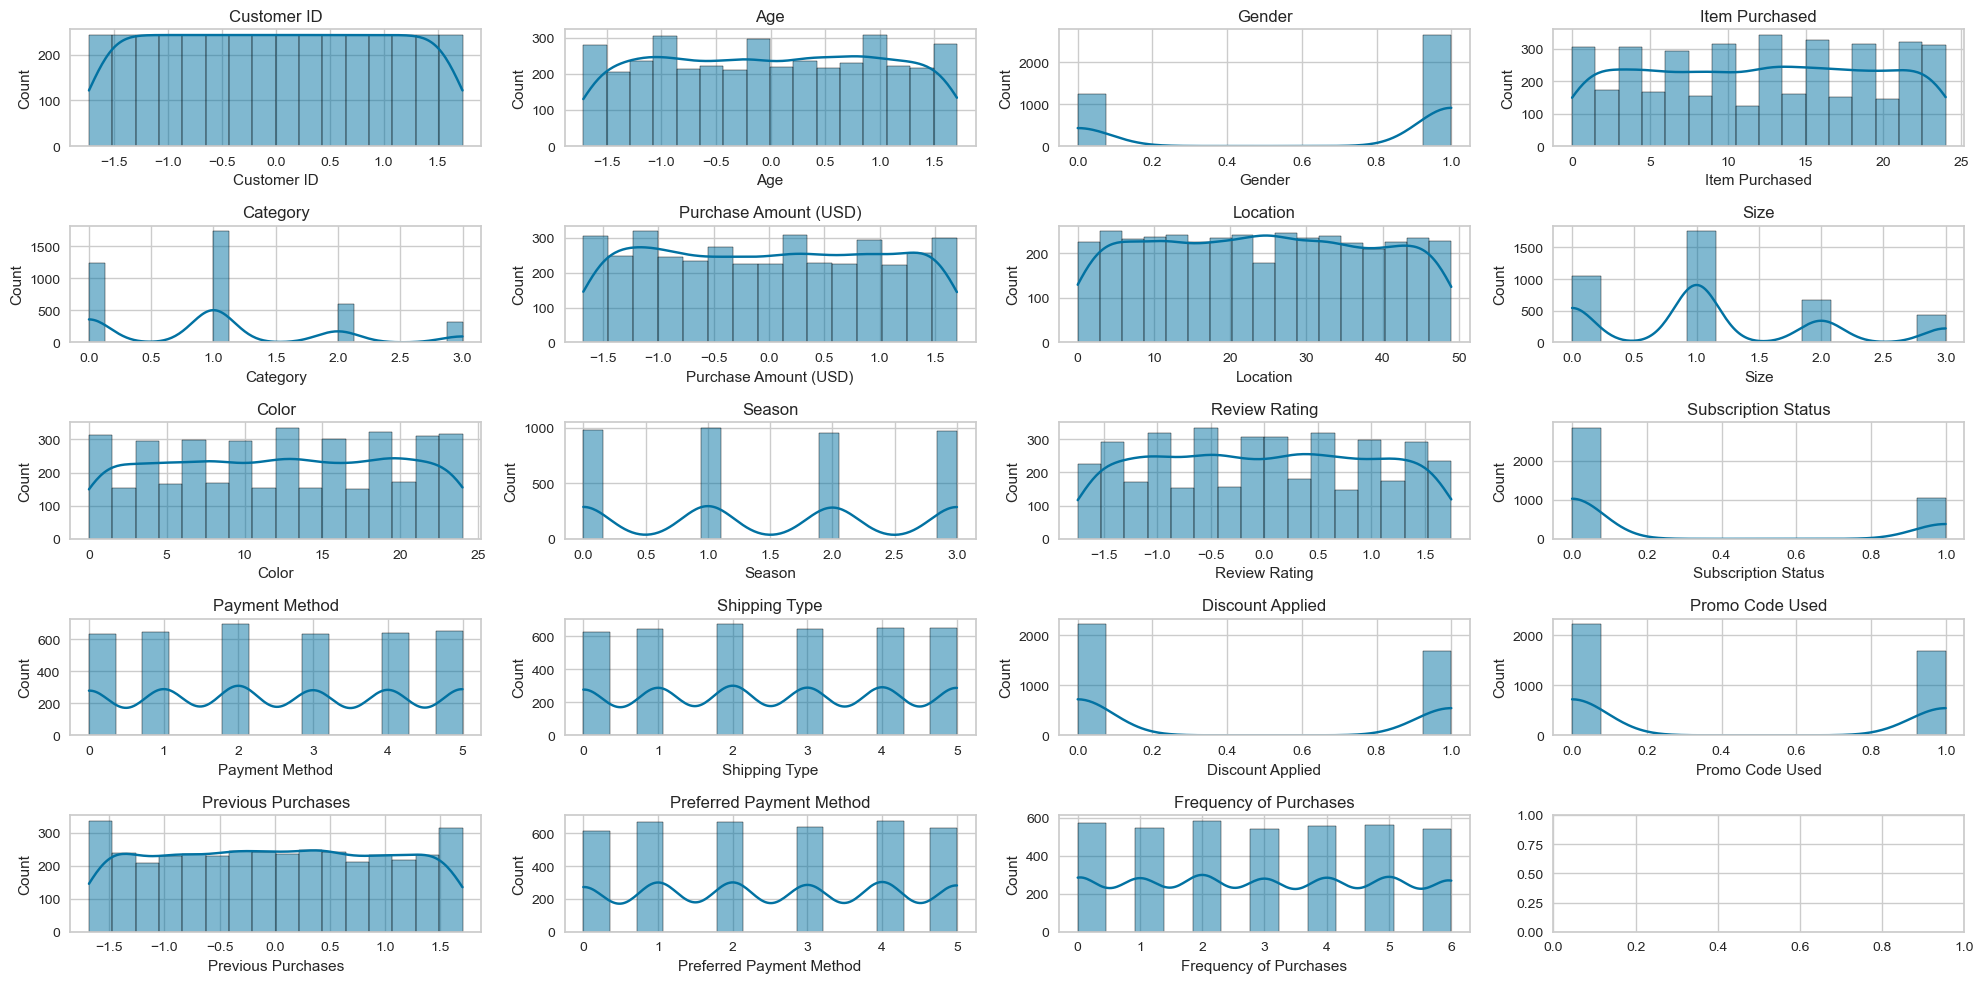

In [10]:
scaler = StandardScaler()

df_encoded[numerical] = scaler.fit_transform(df_encoded[numerical])

num_cols = 4
num_rows = 5

fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 10))

for i, col in enumerate(df_encoded.columns):
    sns.histplot(df_encoded[col], ax=ax[i // num_cols, i % num_cols], kde=True)
    ax[i // num_cols, i % num_cols].set_title(col)
    
plt.tight_layout()
plt.show()

Setelah itu, saya juga melakukan standarisasi untuk setiap data numerik agar menjadi lebih rapi. Kemudian, saya membuat visualisasi histogram untuk setiap kolom data numerik yang sudah di-standarisasi. Pada grafik di atas, sudah terlihat bahwa data memiliki skala yang lebih rapi dibandingkan sebelumnya.

<Axes: >

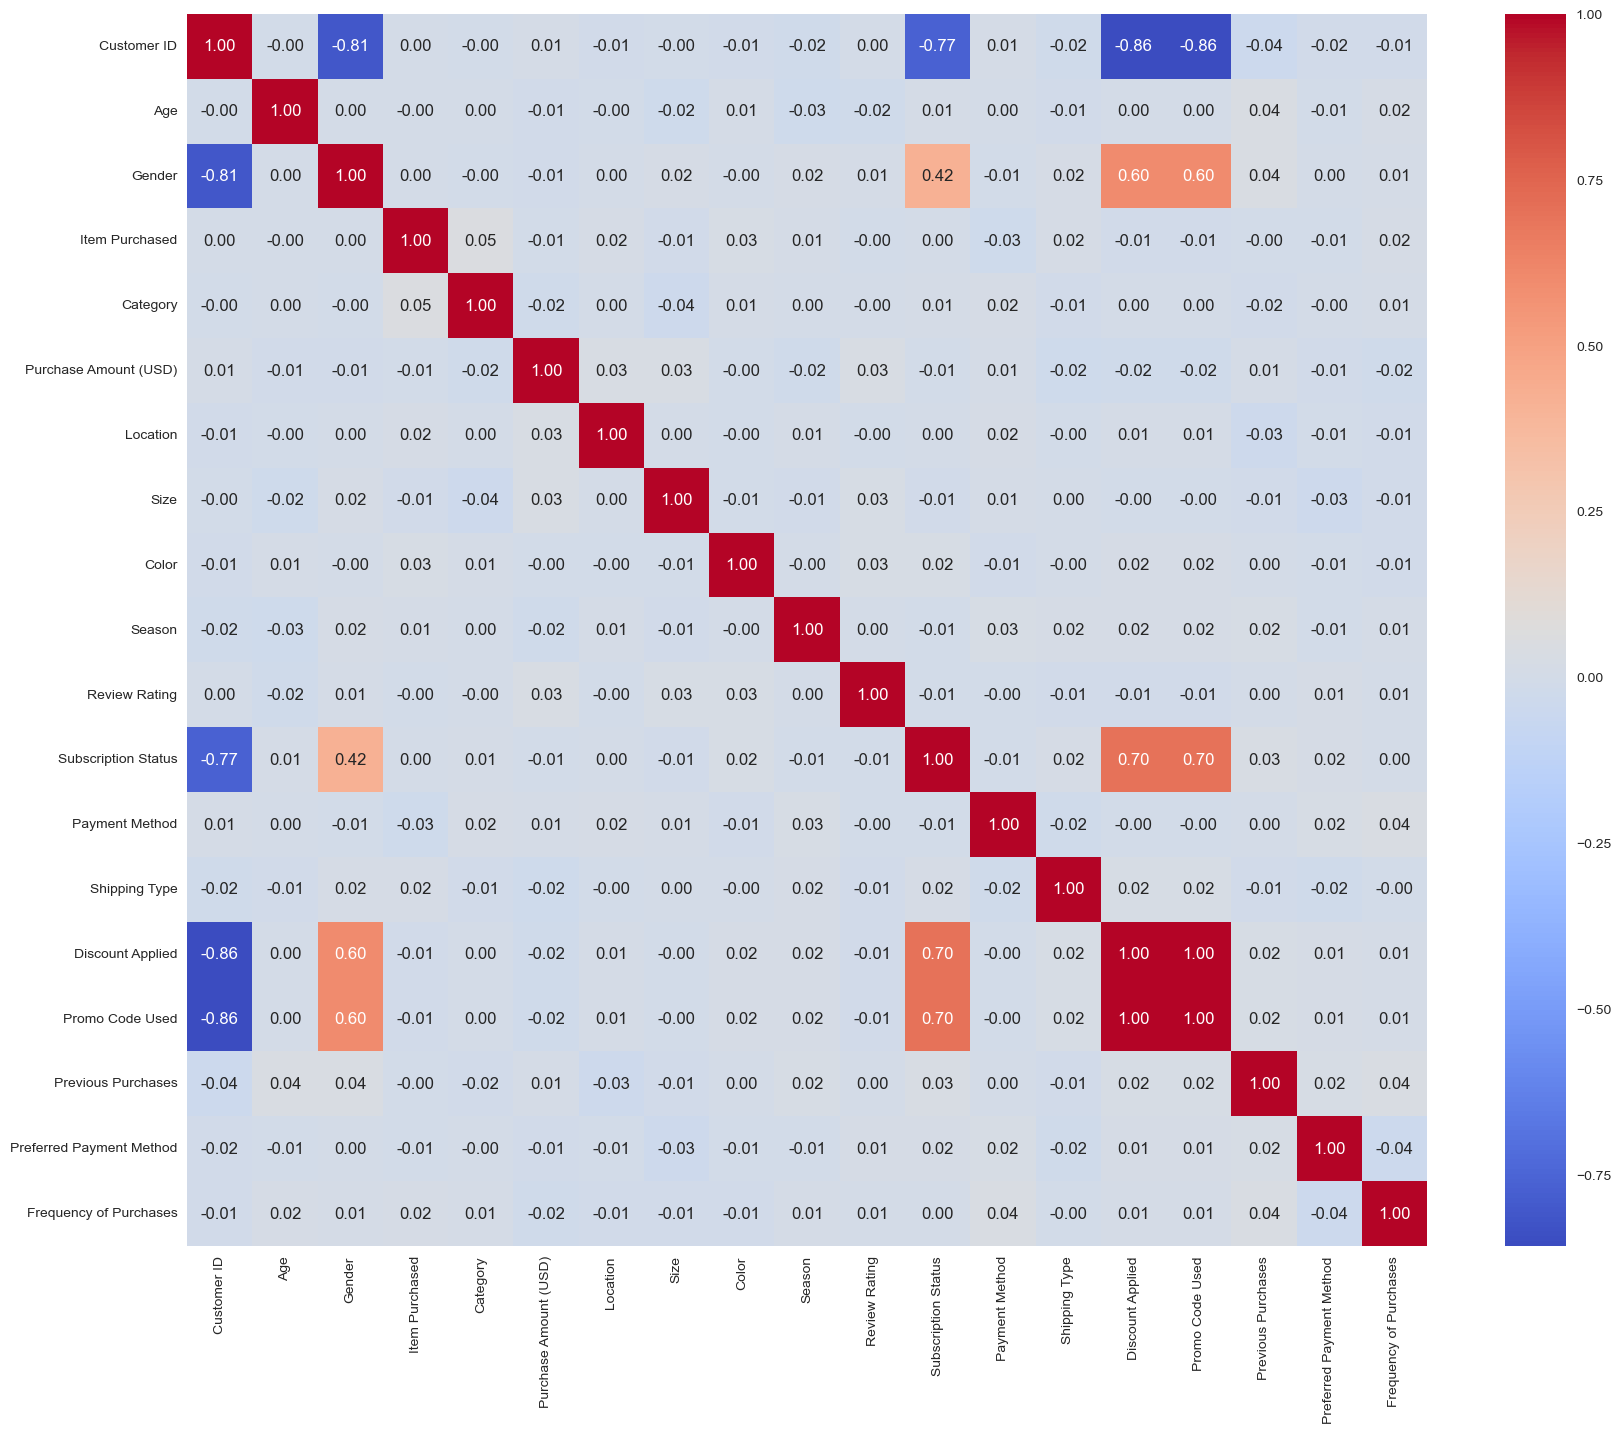

In [11]:
corr = df_encoded.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

In [12]:
df_encoded.to_csv('../data/processed/customers_processed.csv', index=False)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)

Disini saya menggunakan algoritma K-Means Clustering untuk mengelompokkan data.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

In [14]:
silhouette_score(df_encoded, kmeans.fit_predict(df_encoded))

0.2685828380319318

Di awal saya mencoba menggunakan semua variabel dan mendapatkan nilai **silhouette score 0.26**. Hyperparameter yang didapat adalah secara acak dana kan diperbaiki.

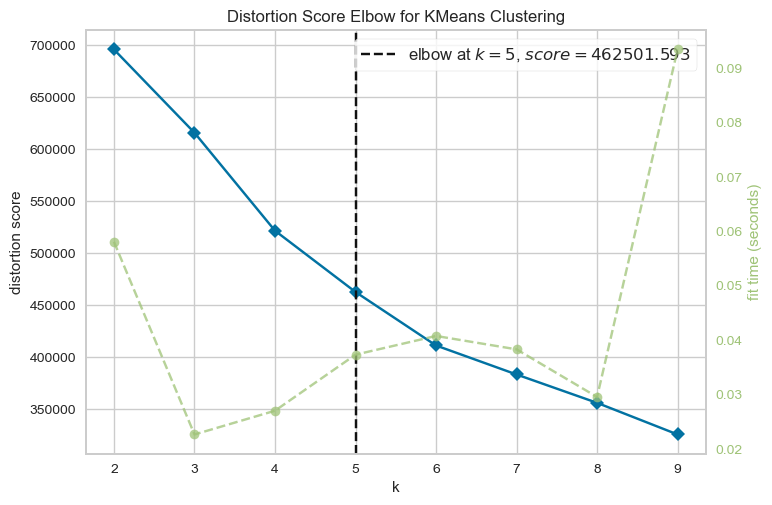

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(df_encoded)
visualizer.show()

Menggunakan elbow method, ternyata nilai k-cluster yang paling optimal berada pada **5 clusters**. Sehingga akan dicoba menggunakan nilai tersebut.

In [16]:
x = df_encoded[['Purchase Amount (USD)', 'Subscription Status']]

kmeans = KMeans(n_clusters=5, random_state=1)
clusters = kmeans.fit_predict(x)
silhouette_score(x, kmeans.fit_predict(x))

0.556929899579033

Pada tahap ini saya melakukan pemilihan fitur untuk memenuhi permintaan soal dan setelah dilakukan beberapa percobaan dengan fitur berbeda, didapatkan nilai silhouette terbesar adalah pada kedua fitur ini.

## **c. Feature Selection (Opsional)**

In [17]:
from sklearn.decomposition import PCA

n_features_to_select = 2
pca = PCA(n_components=n_features_to_select)
df_reduced = pca.fit_transform(df_encoded)

component_importance = np.abs(pca.components_)

top_feature_indices = np.argsort(-component_importance, axis=1)[:, :n_features_to_select]

important_features = {
    f"PC{i+1}": [df_encoded.columns[idx] for idx in component_indices]
    for i, component_indices in enumerate(top_feature_indices)
}

print("Important feature columns for each component:\n", important_features)


Important feature columns for each component:
 {'PC1': ['Location', 'Item Purchased'], 'PC2': ['Color', 'Item Purchased']}


In [18]:
x_important = df_encoded[['Color', 'Item Purchased']]

kmeans = KMeans(n_clusters=5, random_state=1)
silhouette_score(x_important, kmeans.fit_predict(x_important))

0.37525252213443006

Saya menerapkan PCA dengan pertimbangan algoritma ini dapat bekerja untuk tipe clustering. Namun setelah dilakukan PCA dan kembali melakukan pengujian, hasil yang didapat kurang memuaskan dan justru menghasilkan nilai silhouette yang lebih kecil.

## **d. Visualisasi Hasil Clustering**

C:\Users\kevin\AppData\Local\Temp\ipykernel_12900\1626852732.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


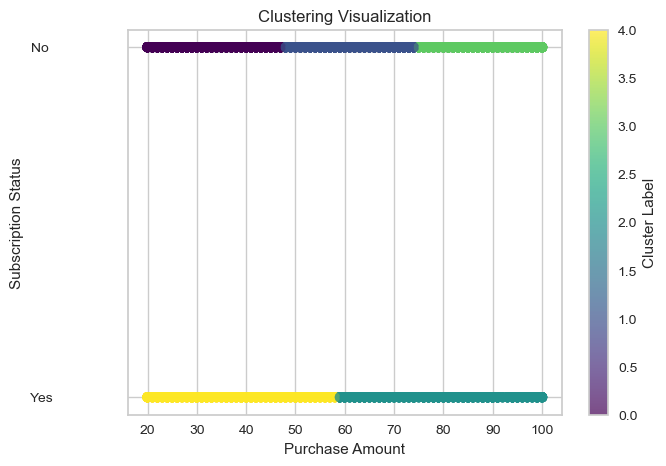

In [37]:
x = df_encoded[['Purchase Amount (USD)', 'Subscription Status']]

kmeans = KMeans(n_clusters=5, random_state=1)
clusters = kmeans.fit_predict(x)
silhouette_score(x, kmeans.fit_predict(x))

plt.figure(figsize=(7, 5))
scatter = plt.scatter(df['Purchase Amount (USD)'], df['Subscription Status'], c=clusters, cmap='viridis', s=50, alpha=0.7)
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)

plt.xlabel('Purchase Amount')
plt.ylabel('Subscription Status')
plt.title('Clustering Visualization')
plt.colorbar(scatter, label='Cluster Label')
plt.legend()
plt.grid(True)
plt.show()

Pada gambar di atas, sudah dilakukan clustering dengan warna yang berbeda-beda sehingga secara jelas terlihat adanya 5 cluster.

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

In [20]:
labels = kmeans.labels_
k = 5
 
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]
 
        purchase_amount_mean = cluster_data['Purchase Amount (USD)'].mean()
        status = cluster_data['Subscription Status'].mode().values[0]
 
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Purchase Amount (USD): {purchase_amount_mean:.2f}")
        print(f"Jenis Subscription Status: {status}")
 
analyze_clusters(df, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Purchase Amount (USD): 33.08
Jenis Subscription Status: No                  

Cluster 2:
Rata-rata Purchase Amount (USD): 61.05
Jenis Subscription Status: No                  

Cluster 3:
Rata-rata Purchase Amount (USD): 79.25
Jenis Subscription Status: Yes                 

Cluster 4:
Rata-rata Purchase Amount (USD): 87.84
Jenis Subscription Status: No                  

Cluster 5:
Rata-rata Purchase Amount (USD): 38.37
Jenis Subscription Status: Yes                 


**Cluster 1:**
- Rata-rata Purchase Amount (USD): 33.08: Cluster ini memiliki pengeluaran rata-rata yang relatif rendah.
- Jenis Subscription Status: No: Mayoritas anggota dalam cluster ini tidak berlangganan.
- Interpretasi: Cluster ini mungkin terdiri dari pengguna yang belum terlibat aktif atau yang memiliki kebiasaan pengeluaran rendah.

**Cluster 2:**
- Rata-rata Purchase Amount (USD): 61.05: Pengeluaran rata-rata lebih tinggi dibandingkan Cluster 1, tetapi masih relatif rendah.
- Jenis Subscription Status: No: Anggota cluster ini juga lebih cenderung tidak berlangganan.
- Interpretasi: Meskipun memiliki pengeluaran sedikit lebih tinggi, anggota cluster ini juga belum berlangganan. Bisa jadi mereka adalah pengguna yang belum melihat nilai dari berlangganan atau yang hanya membeli sesekali.

**Cluster 3:**
- Rata-rata Purchase Amount (USD): 79.25: Pengeluaran rata-rata cukup tinggi, lebih tinggi dibandingkan cluster 1 dan 2.
- Jenis Subscription Status: Yes: Anggota cluster ini sebagian besar berlangganan.
- Interpretasi: Cluster ini terdiri dari pelanggan yang lebih loyal atau lebih aktif dalam membeli, yang juga berlangganan. Mereka mungkin lebih bernilai bagi perusahaan karena pengeluaran mereka yang lebih tinggi dan keterlibatannya yang lebih besar.

**Cluster 4:**
- Rata-rata Purchase Amount (USD): 87.84: Ini adalah cluster dengan pengeluaran rata-rata tertinggi.
- Jenis Subscription Status: No: Namun, anggota dalam cluster ini belum berlangganan.
- Interpretasi: Walaupun cluster ini mengeluarkan uang lebih banyak, mereka belum berlangganan. Ini bisa menunjukkan adanya potensi untuk meningkatkan konversi ke status berlangganan, mungkin dengan memberikan insentif atau penawaran khusus.

**Cluster 5:**
- Rata-rata Purchase Amount (USD): 38.37: Pengeluaran rata-rata berada di tengah, lebih tinggi dibandingkan Cluster 1 tetapi lebih rendah dari Cluster 3 dan 4.
- Jenis Subscription Status: Yes: Anggota cluster ini juga berlangganan.
- Interpretasi: Cluster ini terdiri dari pelanggan yang berlangganan, meskipun pengeluarannya lebih rendah dibandingkan dengan cluster berlangganan lainnya. Mungkin mereka adalah pengguna yang aktif namun dengan pengeluaran lebih terkontrol.

Dengan informasi ini, perusahaan bisa fokus pada pengembangan strategi pemasaran dan penawaran yang lebih terfokus berdasarkan karakteristik pengeluaran dan status berlangganan masing-masing cluster.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [21]:
data_labeled = df.copy()
data_labeled['Cluster'] = labels

data_labeled.to_csv('../data/labeled/customers_segmented.csv', index=False)

Berikut juga dilakukan ekspor untuk model.

In [39]:
import joblib

joblib.dump(kmeans, '../model/kmeans_model.pkl')

['../model/kmeans_model.pkl']